<a href="https://colab.research.google.com/github/YoungsunChoi914/2022-spring/blob/main/image_prorcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing
https://www.w3schools.com/html/html_colors_rgb.asp

In [2]:
import cv2 # openCV (computer vision) package
from google.colab.patches import cv2_imshow # substitution for cv2.imshow
import matplotlib.pylab as plt

image proceessing의 대표적 module cv2
cv2.imshow가 오류가 자주나서 위와 같이 대신 사용하는 것


OpenCV imread, imwrite and imshow indeed all work with the BGR order, so there is no need to change the order when you read an image with cv2.imread and then want to show it with cv2.imshow. While BGR is used consistently throughout OpenCV, most other image processing libraries use the RGB ordering. If you want to use matplotlib's imshow but read the image with OpenCV, you would need to convert from BGR to RGB.

RGB 순서가 아닌, GBR순서로

## download/save an image from Urls

In [3]:
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/tiger.jpg"
os.system("curl " + url + " > test.jpg")

0

어떤 파일을 나의 컴퓨터 계정으로 갖고 오고 싶을 때 위와 같이 작성

## display image

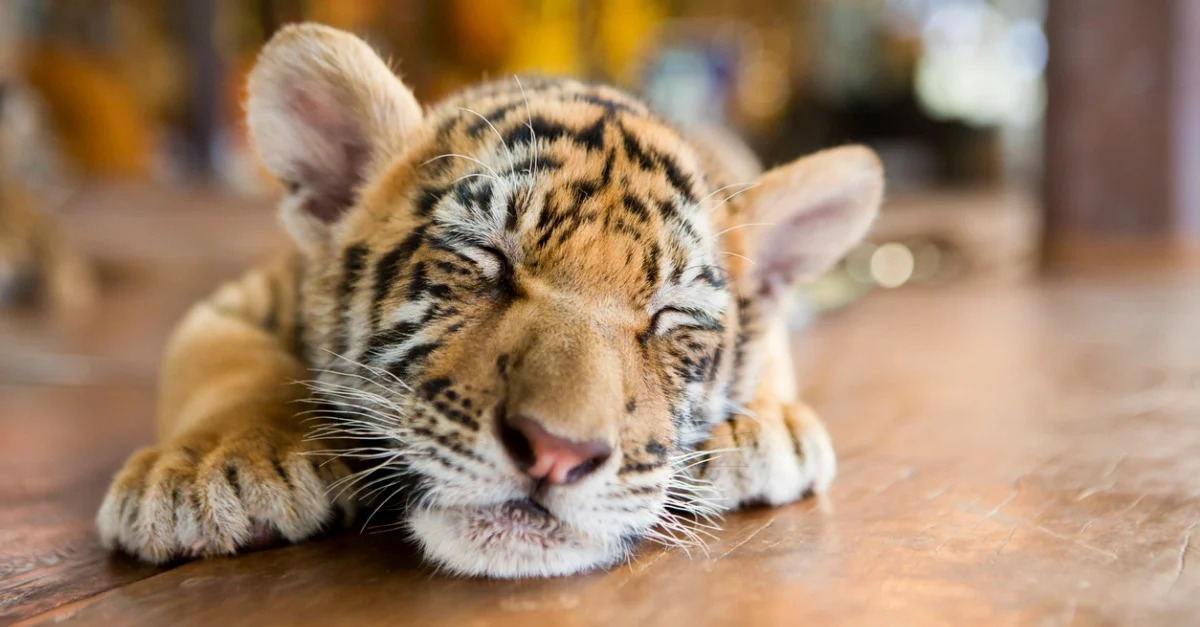

In [4]:
image_bgr = cv2.imread('test.jpg')
cv2_imshow(image_bgr)

()안에 내 계정의 파일 이름을 적어줌. 
cv2_imshow()를 통해 이미지를 보이게 함

imread = image read

## display B, G, R channel

In [5]:
image_bgr

array([[[109, 123, 141],
        [108, 122, 140],
        [105, 120, 136],
        ...,
        [139, 133, 152],
        [139, 133, 152],
        [139, 133, 152]],

       [[109, 123, 141],
        [108, 122, 140],
        [106, 121, 137],
        ...,
        [139, 133, 152],
        [139, 133, 152],
        [139, 133, 152]],

       [[110, 124, 142],
        [109, 123, 141],
        [106, 121, 137],
        ...,
        [140, 134, 153],
        [139, 133, 152],
        [139, 133, 152]],

       ...,

       [[ 71,  93, 129],
        [ 73,  92, 129],
        [ 74,  94, 129],
        ...,
        [147, 167, 192],
        [147, 167, 192],
        [147, 167, 192]],

       [[ 72,  94, 130],
        [ 73,  92, 129],
        [ 73,  93, 128],
        ...,
        [147, 167, 192],
        [147, 167, 192],
        [147, 167, 192]],

       [[ 72,  94, 130],
        [ 74,  93, 130],
        [ 74,  94, 129],
        ...,
        [147, 167, 192],
        [147, 167, 192],
        [147, 167, 192]]

3: 첫번째 괄호 안에, 109(b), 123(g), 141(r) 의 3개/ 첫번째 줄은 전부 b와 관련, 두번째 줄은 전부 g와 관련, 세번재 줄은 전부 r과 관련

---

1200: 두번째 괄호 안에, 3개의 숫자로 이루어진 첫번째 괄호의 쌍이 1200개

---

627: 세번째 괄호 안에, 1200개의 쌍으로 이루어진 두번째 괄호의 쌍이 627개

In [6]:
print(type(image_bgr)); print(image_bgr.shape)

<class 'numpy.ndarray'>
(627, 1200, 3)


3d array(627, 1200, 3)

---


ex) image_bgr에 담긴 숫자는 총 몇개인가? - 627x1200x3 개

---

b, g, r에 각각 627x1200개의 숫자가 담김

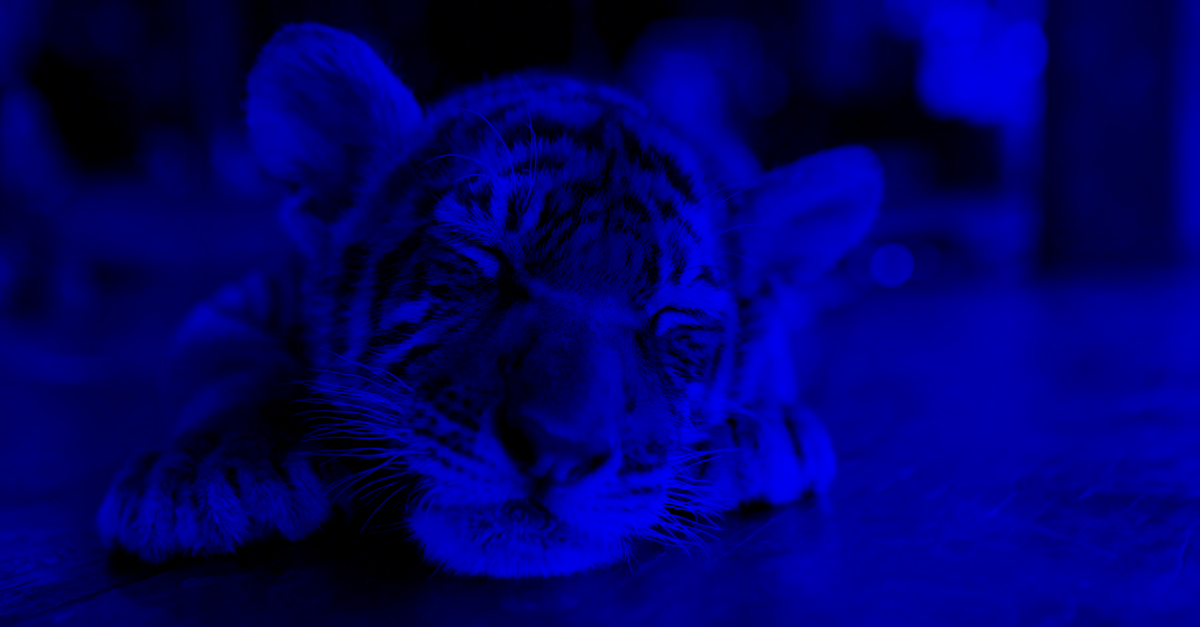

In [7]:
image_b = image_bgr.copy()
image_b[:,:,[1,2]] = 0
cv2_imshow(image_b)

copy function을 사용하지 않으면 image_b를 수정할 때 image_bgr도 같이 수정이 되어버림. 

---
image_b[:,:,[1,2]]=0 -> 두번째(g), 세번째(r) column의 모든 숫자 값을 0으러 만드는것 -> blue만 남는 상태


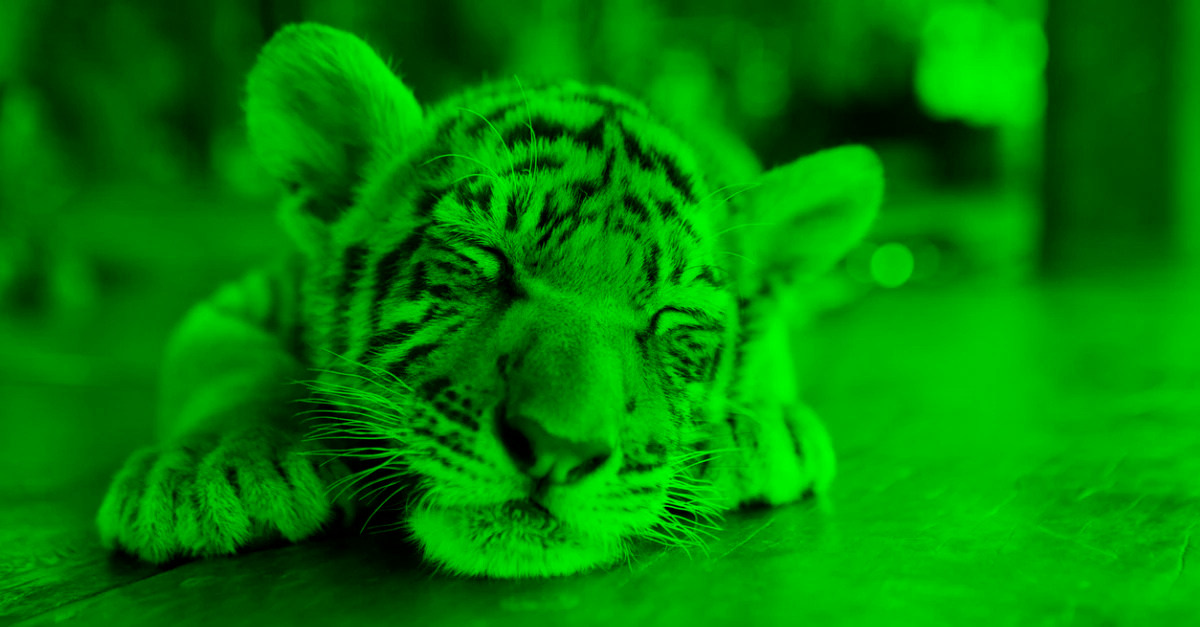

In [8]:
image_g = image_bgr.copy()
image_g[:,:,[0,2]] = 0
cv2_imshow(image_g)

green 만 남기는 것

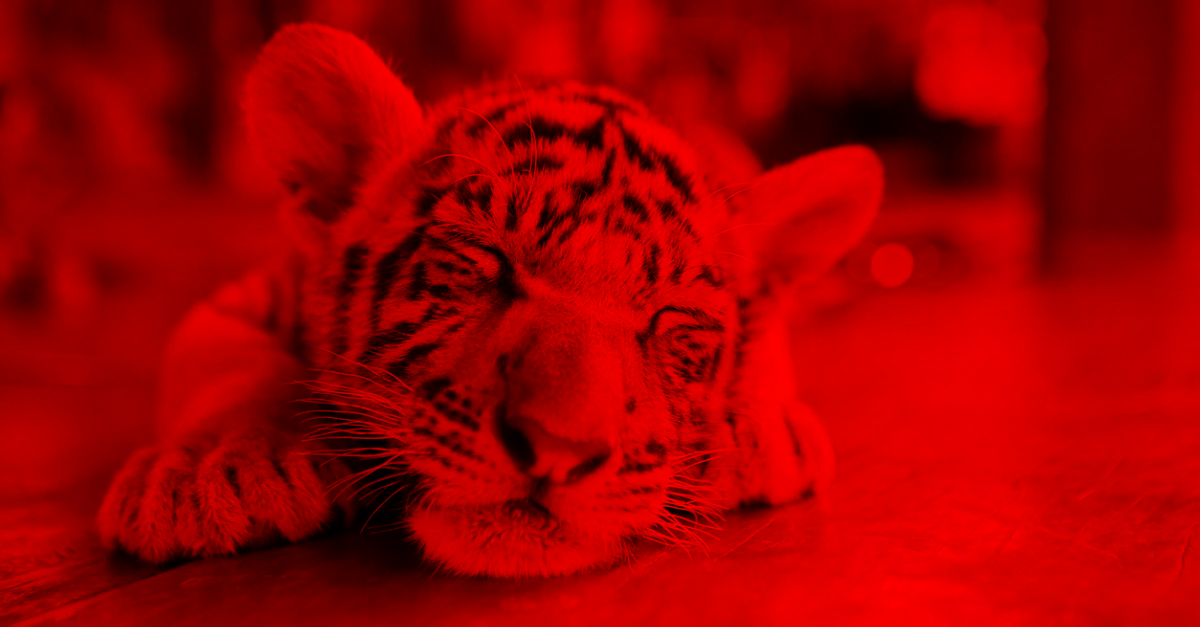

In [9]:
image_r = image_bgr.copy()
image_r[:,:,[0,1]] = 0
cv2_imshow(image_r)

red만 남기는 것

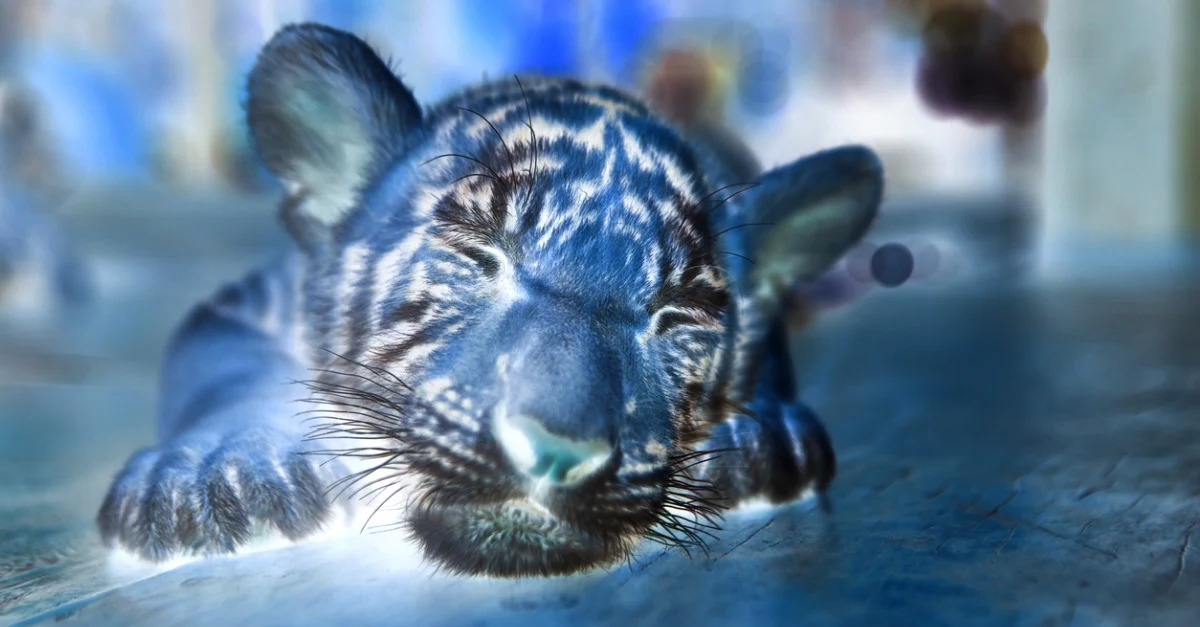

In [10]:
image_inverse = 255 - image_bgr
cv2_imshow(image_inverse)

(627, 1200, 3)개로 되어 있는 nd array의 모든 값들을 255로 채운 것에서 기존 사진의 값들을 빼주는 것 -> 모든 색깔 반전

##histograms

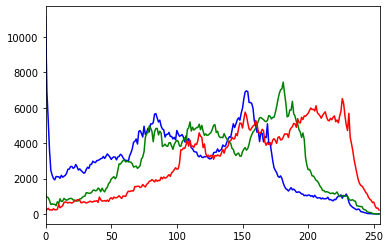

In [11]:
# Display the histogram of R, G, B channel
color = ['b','g','r']
for i in range(len(color)):
    histr = cv2.calcHist([image_bgr],[i],None,[255],[0,255]) # ([image], [nChannel], mask, [histSize], [range])
    plt.plot(histr, color = color[i])
    plt.xlim([0,255])

len(color)=3
range3이므로 index 3개를 만듦. i에는 0, 1, 2 가 담김.

---

bins: 히스토그램 가로축 구간 개수 / 
[255]는 가로축을 255칸으롤 나눈 것



---

color[i]에서 차례로 0, 1, 2가 들어가서 각 색이 표시됨

---

nChannel이 무슨 뜻?????


---




히스토그램 해석: 각각 100에 b, g, r이 몇개씩 들어가는지 표시

---


 r은 높은 수치들이 많고, 비교적 b는 낮은 수치들이 많음 -> 실제 사진 상에서 파란색에 비해 빨간빛이 더 많이 사용된 느낌


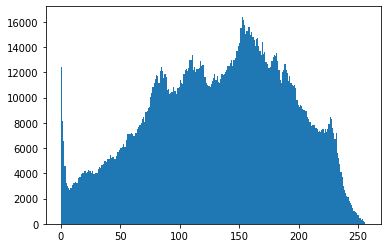

In [12]:
# Display the histogram of all the pixels in the color image
plt.hist(image_bgr.ravel(), bins = 256, range = [0,256]) 
plt.show()

(627, 1200, 3)에서 3 부분이 [12, 213, 57]처럼 있었는데, 이것을 각각 [12], [213], [57]로 나누어서 plotting 하면 위와 같은 모양

---
같은 x 값에서, 기존의 bgr 세 값을 합한 수치가 나타남을 알 수 있음

---
해석: 오른쪽이 높게 나타나면 모든 빛이 많이 사용된 것이므로 밝은 그림, 반대로 왼쪽이 높게 나타나면 어두운 그림



## gray transformation

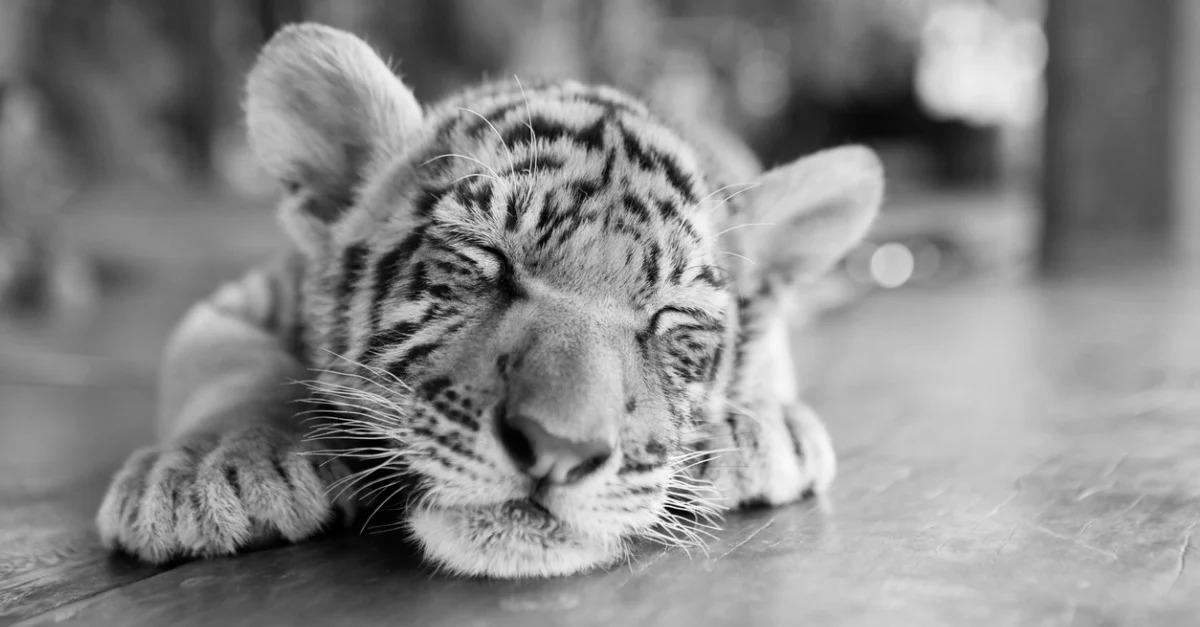

In [13]:
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)

cv2.cvtColor (convert color의 의미)